<a href="https://colab.research.google.com/github/idcesares/AiQuiz/blob/main/PUCRIO_ICD_VOTES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de registros de voto do Congresso dos EUA

## Importando as bibliotecas principais

In [22]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

## Importando o dataset

In [23]:
votes = pd.read_csv('https://raw.githubusercontent.com/idcesares/Data-Science-Mini-Projects/main/datasets/house-votes-84.csv', na_values='?')

## Pré-processamento e análise exploratória de dados

### Primeiras 5 linhas do dataset

In [24]:
votes.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


### Quantidade de atributos e instâncias

In [25]:
print(f'Número de Atributos: {votes.shape[0]} | Número de instâncias: {votes.shape[1]}')

Número de Atributos: 435 | Número de instâncias: 17


### Listagem de atributos

In [26]:
pd.Series(votes.columns)

0                                  Class Name
1                         handicapped-infants
2                  water-project-cost-sharing
3           adoption-of-the-budget-resolution
4                        physician-fee-freeze
5                             el-salvador-aid
6                 religious-groups-in-schools
7                     anti-satellite-test-ban
8                   aid-to-nicaraguan-contras
9                                  mx-missile
10                                immigration
11               synfuels-corporation-cutback
12                         education-spending
13                     superfund-right-to-sue
14                                      crime
15                          duty-free-exports
16     export-administration-act-south-africa
dtype: object

### Resumo estatístico dos atributos - Dados categóricos em texto



In [27]:
votes.describe(include='all')

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,435,423,387,424,424,420,424,421,420,413,428,414,404,410,418,407,331
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


### Gráfico de distribuição de frequência de classes

Text(0, 0.5, 'Contagem')

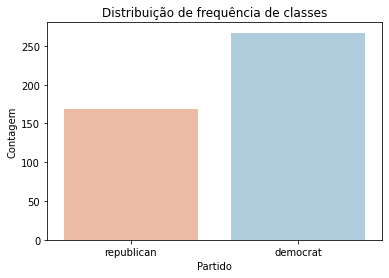

In [28]:
sns.countplot(x=votes['Class Name'], palette='RdBu')
plt.title('Distribuição de frequência de classes')
plt.xlabel('Partido')
plt.ylabel('Contagem')

**Proporção:**

In [29]:
percentiles = votes['Class Name'].value_counts(normalize=True)
print(f'Democratas: {(percentiles[0] * 100).round(2)}%')
print(f'Republicanos: {(percentiles[1] * 100).round(2)}%')

Democratas: 61.38%
Republicanos: 38.62%


### Gráficos de distribuição de classes por atributos

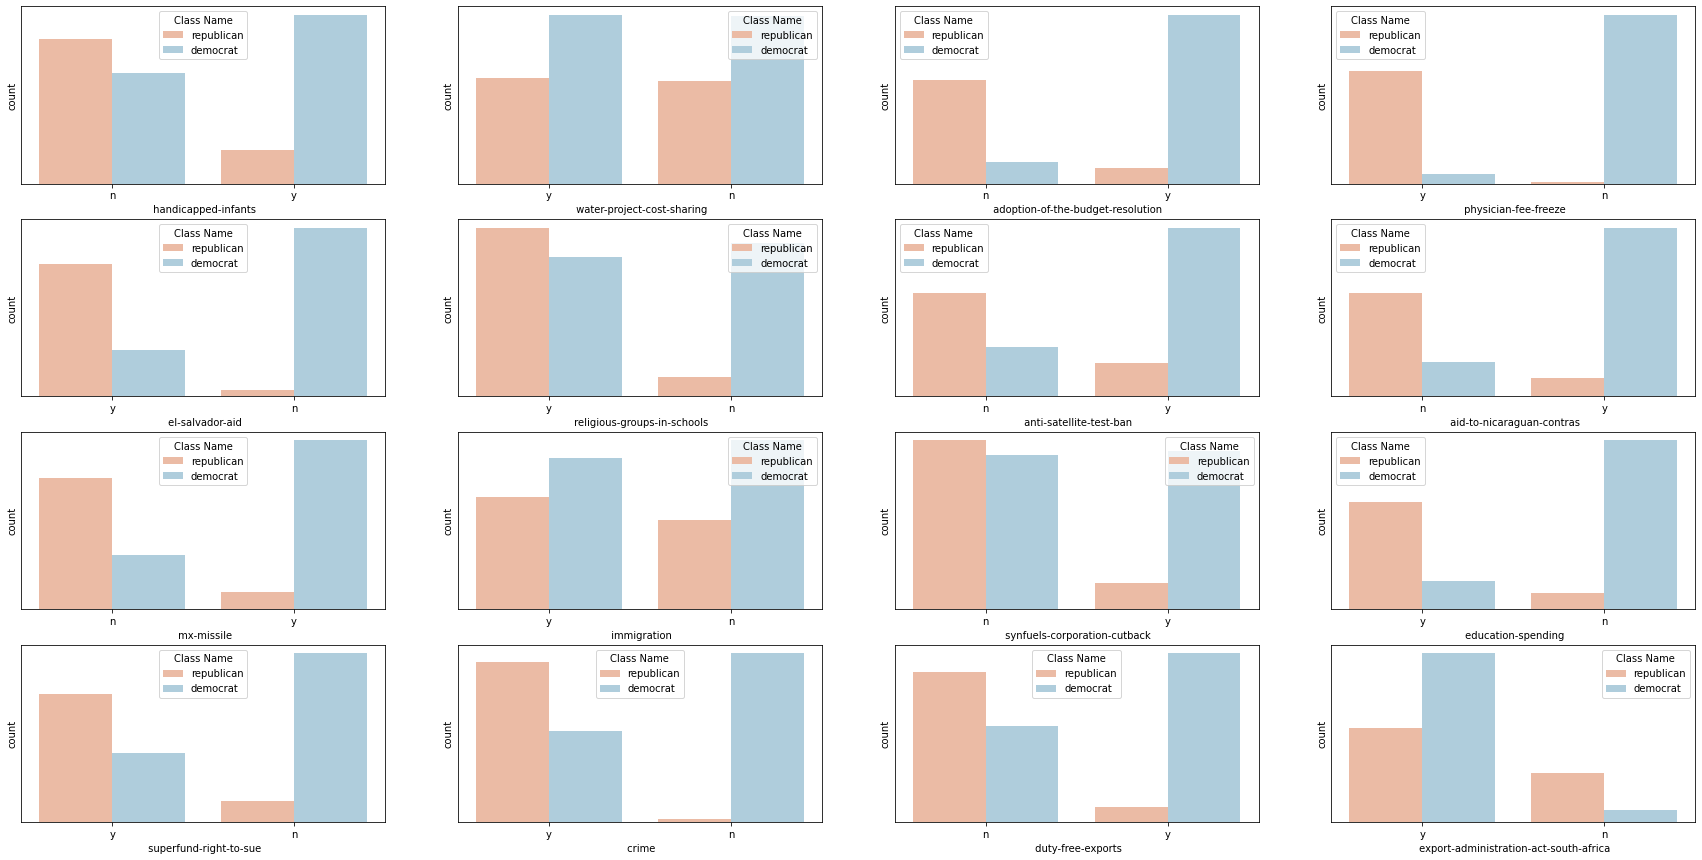

In [30]:
index = votes.drop('Class Name', axis=1).columns 
z = 0
fig, axes = plt.subplots(4, 4, figsize=(30, 15))
for i in range(4):
    for j in range(4):   
        sns.countplot(x = index[z+j], hue='Class Name', data=votes, palette='RdBu', ax=axes[i][j])
        axes[i][j].set_yticks([])
    z = z + j + 1
plt.show()

### Transformação de dados categóricos em texto para tipo numérico

In [31]:
votes.replace({'y':1, 'n':0, 'democrat':1, 'republican':0}, inplace=True)
votes.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,1,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,1,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


### Resumo estatístico dos atributos - Dados categóricos numéricos

In [32]:
votes.describe().round(2)

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,435.00,423.00,387.0,424.00,424.00,420.0,424.00,421.00,420.00,413.0,428.0,414.00,404.00,410.00,418.00,407.00,331.00
mean,0.61,0.44,0.5,0.60,0.42,0.5,0.64,0.57,0.58,0.5,0.5,0.36,0.42,0.51,0.59,0.43,0.81
std,0.49,0.50,0.5,0.49,0.49,0.5,0.48,0.50,0.49,0.5,0.5,0.48,0.49,0.50,0.49,0.50,0.39
min,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,1.00
50%,1.00,0.00,1.0,1.00,0.00,1.0,1.00,1.00,1.00,1.0,1.0,0.00,0.00,1.00,1.00,0.00,1.00
75%,1.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.00,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00
max,1.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.00,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00


### Heatmap da correlação entre os atributos

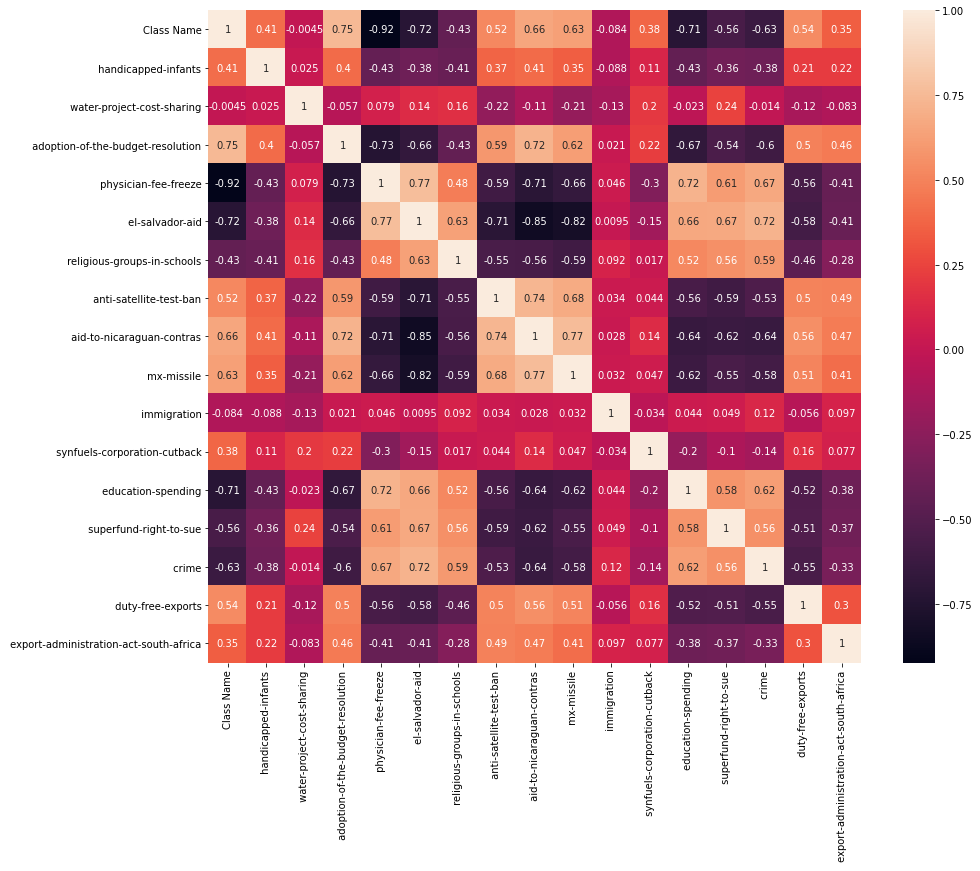

In [33]:
plt.figure(figsize=(15,12))
sns.heatmap(votes.corr(), square=True, annot=True)

### Gráfico de atributes em pares com scatterplots

In [34]:
#sns.pairplot(votes)

### Análise de valores faltantes

Total de valores faltantes por atributo:

In [35]:
missing_values = pd.DataFrame(votes.isna().sum(), columns=['Qtd. valores faltantes'])
missing_values

,Qtd. valores faltantes
Class Name,0
handicapped-infants,12
water-project-cost-sharing,48
adoption-of-the-budget-resolution,11
physician-fee-freeze,11
el-salvador-aid,15
religious-groups-in-schools,11
anti-satellite-test-ban,14
aid-to-nicaraguan-contras,15
mx-missile,22


In [36]:
print(f'Total de valores faltantes: {votes.isna().sum().sum()}')

Total de valores faltantes: 392


In [37]:
print(f'Tamanho do dataset com valores faltantes: {votes.shape}')
print(f'Tamanho do dataset sem valores faltantes: {votes.dropna().shape}')

Tamanho do dataset com valores faltantes: (435, 17)
Tamanho do dataset sem valores faltantes: (232, 17)


### Solução para valores faltantes: **SimpleImputer**

In [38]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
df_columns = votes.columns
votes = pd.DataFrame(imputer.fit_transform(votes), columns=df_columns)

In [39]:
print(f'Verificação de dados faltantes: {votes.isna().sum().sum()}')

Verificação de dados faltantes: 0


Verificando proporção após inserção de novos valores

In [40]:
votes.groupby('Class Name').count()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
Class Name,,,,,,,,,,,,,,,,
0.0,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168
1.0,267,267,267,267,267,267,267,267,267,267,267,267,267,267,267,267


## Preparação de dados e seleção de modelos

### Divisão do dataset: X e y

In [41]:
X = votes.drop('Class Name', axis=1)
y = votes['Class Name']

### Divisão do Dataset: Treino e Teste usando o **train_test_split**

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Seleção  e treinamento de modelo: **LinearSVC**

In [47]:
from sklearn import svm

clf = svm.LinearSVC()

In [49]:
clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

### Predição

In [51]:
y_preds = clf.predict(X_test)

array([1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.])

Comparação visual entre predição e resultados verdadeiros: Primeiros 10 elementos

In [57]:
print(np.array(y_test[:10]))
print(y_preds[:10])

[1. 1. 0. 0. 0. 0. 1. 0. 1. 0.]
[1. 1. 0. 0. 0. 0. 1. 0. 1. 0.]


### Avaliação do modelo usando a métrica **accuracy_score**

In [61]:
from sklearn.metrics import accuracy_score

print(f'Porcentagem de acurácia do modelo: {(accuracy_score(y_test, y_preds)*100).round(2)}%')

Porcentagem de acurácia do modelo: 96.18%
